<a href="https://colab.research.google.com/github/Rishikesh802/Predict-COVID-19-Diagnosis-Using-Machine-Learning-Techniques/blob/main/New1_COVID_19_Diagnosis_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Diagnosis Prediction Project

1 --> Goal: The assignment aims to predict COVID-19 diagnosis based on symptoms
and demographic data, utilizing data analysis and machine learning techniques.


2 --> How: We use Python and MySQL for data analysis, EDA, feature engineering, and
machine learning to predict COVID-19 outcomes.


3 --> Why: Our project is crucial for early COVID-19 detection, efficient healthcare

# Problem Statement

A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ABC government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID 19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020.

# Features used in the model:

## Basic information:

1. ID (Individual ID)

2. Sex (male female)

3. Age 280 above years (true/false)

4. Test date (date when tested for COVID_19)

## Symptoms:

5. Cough (true/false)

6. Fever (true/false)

7. Sore throat (true/false)

8. Shortness of breath (true /false)

9. Headache (true/false)

## Other information:

10. Known contact with an individual confirmed to have COVID-19 (true / false)

## Covid report

11. Corona positive or negative

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warning is used to supress the display of warnings
import warnings
warnings.filterwarnings("ignore")


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



In [2]:
data = pd.read_csv("corona_tested_006 (2).csv")

In [3]:
Covid_data = data.copy() #copy data into a new variable, covid_data.
Covid_data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


# Data Cleaning


In [4]:
Covid_data.shape

(278848, 11)

In [5]:
Covid_data.head()


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [6]:
Covid_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


Here, Python read Test_date as object it means that the dates are currently stored as strings.so we need to convert Test_date in to datetime format

In [7]:
for column in Covid_data:
  unique_value=Covid_data[column].unique()
  print(f"unique Value in {column}:",unique_value) # Checking Unique values in each column

unique Value in Ind_ID: [     1      2      3 ... 278846 278847 278848]
unique Value in Test_date: ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
unique Value in Cough_symptoms: [True False nan]
unique Value in Fever: [False True nan]
unique Value in Sore_throat: [True False nan]
unique Value in Shortness_of_breath: [False True nan]
unique Value in Headache: [False True

Here , we can see that some columns like 'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache' contains some Boolean values so we need to replace this boolean values and None values with appropriate strings and NaN.

Becuase this can potentially affect our data analysis and machine learning model

In [8]:
columns_to_replace = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Replace boolean values and 'None' with appropriate strings and NaN
Covid_data[columns_to_replace] = Covid_data[columns_to_replace].replace({True: 'TRUE',False: 'FALSE','None': np.nan})


In [9]:
#Date_Time Formatting using  pd.to_datetime() function and specifying the date format as '%d-%m-%Y'.

Covid_data['Test_date'] = pd.to_datetime(Covid_data['Test_date'], format='%d-%m-%Y')

In [10]:
Covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Test_date            278848 non-null  datetime64[ns]
 2   Cough_symptoms       278596 non-null  object        
 3   Fever                278596 non-null  object        
 4   Sore_throat          278847 non-null  object        
 5   Shortness_of_breath  278847 non-null  object        
 6   Headache             278847 non-null  object        
 7   Corona               278848 non-null  object        
 8   Age_60_above         151528 non-null  object        
 9   Sex                  259285 non-null  object        
 10  Known_contact        278848 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 23.4+ MB


In [11]:
Covid_data['Corona'].value_counts()

,count
Corona,
negative,260227
positive,14729
other,3892


This category might include cases where the test results are inconclusive, or the test may be for a different condition rather than COVID-19. so we replace this other category with mode value.

In [12]:
Covid_data['Corona'].mode()

,Corona
0,negative


In [13]:
# here we do replacement

Covid_data ['Corona'].replace('other','negative',inplace = True)

In [14]:
Covid_data ['Age_60_above'].value_counts()

,count
Age_60_above,
No,125703
Yes,25825


For the records where Age_60_above is labeled as "None," it could mean that the

data for the age group is missing or not provided.

so we replace None value with mode() .

In [15]:
Covid_data['Age_60_above'].mode()

,Age_60_above
0,No


In [16]:
Covid_data ['Age_60_above'].replace('None','No',inplace = True)

In [17]:
Covid_data['Age_60_above'].value_counts()

,count
Age_60_above,
No,125703
Yes,25825


In [18]:
Covid_data['Sex'].value_counts()

,count
Sex,
female,130158
male,129127


In [19]:
Covid_data['Sex'].mode()

,Sex
0,female


In [20]:
Covid_data ['Sex'].replace('None','female',inplace = True)


In [21]:
Covid_data['Known_contact'].value_counts()

,count
Known_contact,
Other,242741
Abroad,25468
Contact with confirmed,10639


In [22]:
Covid_data['Test_date'].value_counts()

,count
Test_date,
2020-04-20,10921
2020-04-19,10199
2020-04-22,9646
2020-04-21,9624
2020-04-16,9138
2020-04-23,8744
2020-04-01,8654
2020-04-13,8425
2020-04-02,8188


In [23]:
for column in Covid_data:
  unique_value=Covid_data[column].unique()
  print(f"unique Value in {column}:",unique_value) # Checking Unique values in each column


unique Value in Ind_ID: [     1      2      3 ... 278846 278847 278848]
unique Value in Test_date: <DatetimeArray>
['2020-03-11 00:00:00', '2020-03-12 00:00:00', '2020-03-13 00:00:00',
 '2020-03-14 00:00:00', '2020-03-15 00:00:00', '2020-03-16 00:00:00',
 '2020-03-17 00:00:00', '2020-03-18 00:00:00', '2020-03-19 00:00:00',
 '2020-03-20 00:00:00', '2020-03-21 00:00:00', '2020-03-22 00:00:00',
 '2020-03-23 00:00:00', '2020-03-24 00:00:00', '2020-03-25 00:00:00',
 '2020-03-26 00:00:00', '2020-03-27 00:00:00', '2020-03-28 00:00:00',
 '2020-03-29 00:00:00', '2020-03-30 00:00:00', '2020-03-31 00:00:00',
 '2020-04-01 00:00:00', '2020-04-02 00:00:00', '2020-04-03 00:00:00',
 '2020-04-04 00:00:00', '2020-04-05 00:00:00', '2020-04-06 00:00:00',
 '2020-04-07 00:00:00', '2020-04-08 00:00:00', '2020-04-09 00:00:00',
 '2020-04-10 00:00:00', '2020-04-11 00:00:00', '2020-04-12 00:00:00',
 '2020-04-13 00:00:00', '2020-04-14 00:00:00', '2020-04-15 00:00:00',
 '2020-04-16 00:00:00', '2020-04-17 00:00:00'

In [24]:
#Count null values in each column of covid_data
Covid_data.isnull().sum().sort_values(ascending=False)

,0
Age_60_above,127320
Sex,19563
Cough_symptoms,252
Fever,252
Sore_throat,1
Shortness_of_breath,1
Headache,1
Ind_ID,0
Test_date,0
Corona,0


Here, we can see that some columns contain null values . so we drop this null values using dropna() function

In [25]:
Covid_data.dropna(inplace=True) #Dropping all the null values


In [26]:
#Count null values in each column of covid_data after Drop null values
Covid_data.isnull().sum()

,0
Ind_ID,0
Test_date,0
Cough_symptoms,0
Fever,0
Sore_throat,0
Shortness_of_breath,0
Headache,0
Corona,0
Age_60_above,0
Sex,0


In [27]:
Covid_data.head()


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,2020-03-22,TRUE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Abroad
13728,13729,2020-03-22,TRUE,FALSE,FALSE,FALSE,FALSE,negative,No,female,Abroad
13730,13731,2020-03-22,TRUE,TRUE,FALSE,FALSE,FALSE,positive,Yes,female,Other
13731,13732,2020-03-22,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,female,Other
13732,13733,2020-03-22,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,female,Other


In [28]:
# After cleaning we are saving our file for mysql analysis.

Covid_data.to_csv('covid_modified.csv')

# Data Visualization and EDA

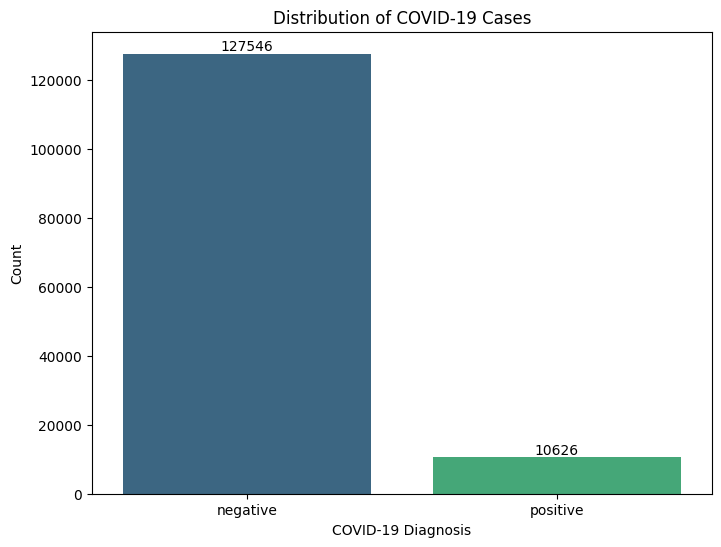

In [29]:
#  Visualize the data to identify patterns and correlations

plt.figure(figsize=(8, 6))
sns.countplot(x='Corona', data=Covid_data, palette='viridis')

# Add value counts on top of the bars
for index, value in enumerate(Covid_data['Corona'].value_counts()):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.title('Distribution of COVID-19 Cases')
plt.xlabel('COVID-19 Diagnosis')
plt.ylabel('Count')
plt.show()


we have a dataset with 278,848 records related to COVID-19 testing and from the above bar graph we can categorized the result into three groups:

positive_cases (14,694),

negative_cases (2,60,008),

and other_cases (3,892).

so my positive_case rate is 14,694/2,78,848 = 0.052%

negative case rate 2,60,008 / 2,78,848 = 0.93%

so this graph indicating that our dataset is imbalanced.

Adding Value Counts on Top of Bars:

for index, value in enumerate(Covid_data['Corona'].value_counts()): iterates over the value counts of each category in the 'Corona' column.
plt.text(index, value + 5, str(value), ha='center', va='bottom') adds text labels on top of each bar. It places the count value (value) at the corresponding x-coordinate (index). The +5 is used to provide some space between the bar and the label. The ha and va parameters control the horizontal and vertical alignment, respectively.


The enumerate function is used to iterate over the counts of each category.
The plt.text function is then used to add the count value on top of each bar.

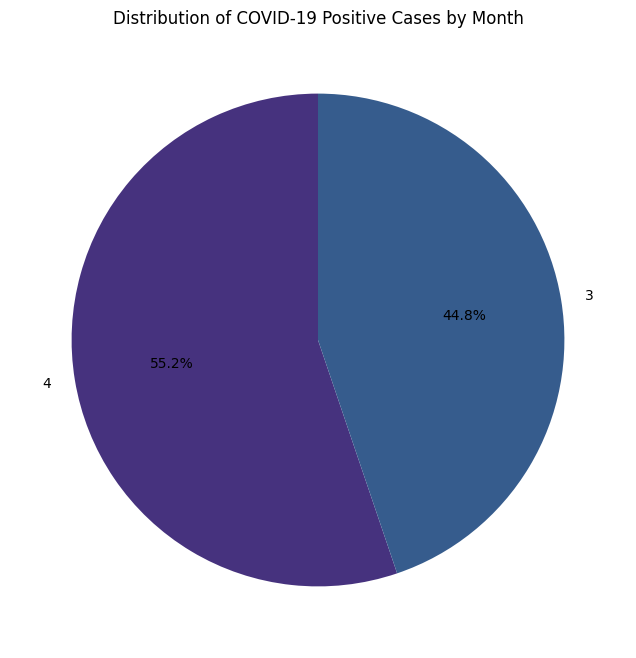

In [30]:

Covid_data['Test_date'] = pd.to_datetime(Covid_data['Test_date'])

# Extract the month from the 'Test_date' column
Covid_data['month'] = Covid_data['Test_date'].dt.month

# Filter the data for positive COVID-19 cases
positive_cases = Covid_data[Covid_data['Corona'] == 'positive']

# Count the occurrences of positive cases for each month
month_counts = positive_cases['month'].value_counts()

# Create a pie chart for month-wise positive cases
plt.figure(figsize=(8, 8))
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of COVID-19 Positive Cases by Month')
plt.show()


from above pie chart we can see that in 3rd month(march) we got 39.7% of positive cases  and in 4th month (april) we got 60.3% of the total  positive cases .

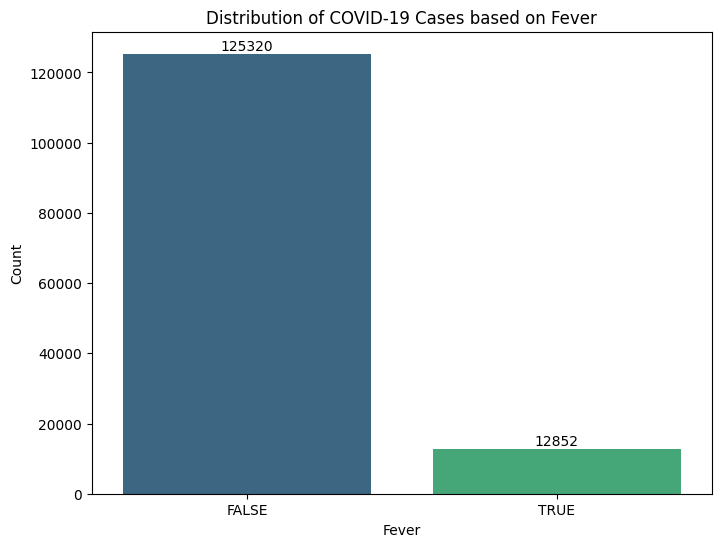

In [31]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Fever', data=Covid_data, palette='viridis')

# Add value counts on top of the bars
for index, value in enumerate(Covid_data['Fever'].value_counts()):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.title('Distribution of COVID-19 Cases based on Fever')
plt.xlabel('Fever')
plt.ylabel('Count')
plt.show()


from above bar plot we  observed that 21,751 people in our dataset were identified as having a fever.

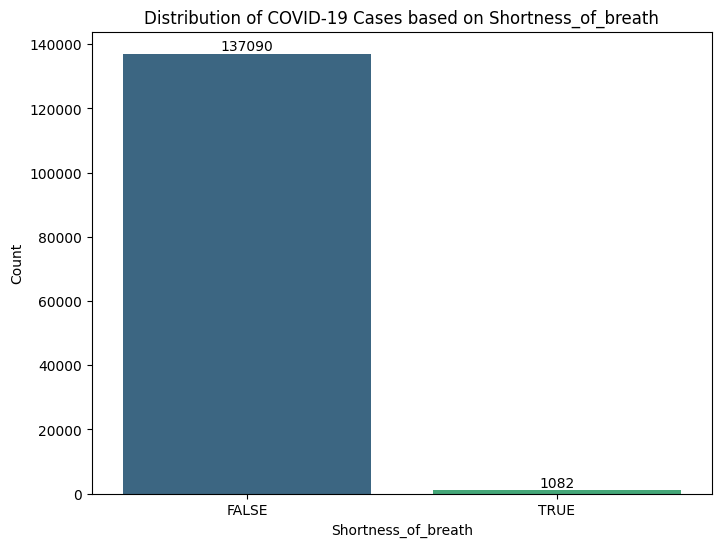

In [32]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Shortness_of_breath', data=Covid_data, palette='viridis')

# Add value counts on top of the bars
for index, value in enumerate(Covid_data['Shortness_of_breath'].value_counts()):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.title('Distribution of COVID-19 Cases based on Shortness_of_breath')
plt.xlabel('Shortness_of_breath')
plt.ylabel('Count')
plt.show()


from above bar plot we  observed that 1574 people in our dataset were identified as having a Shortness_of_breath.

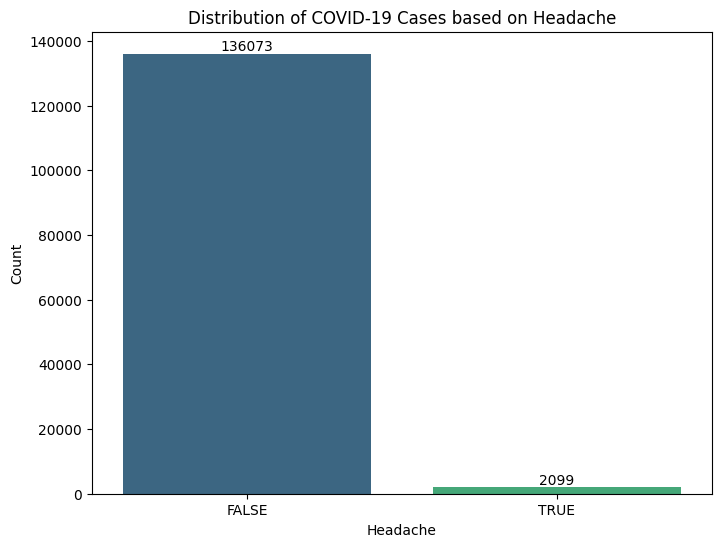

In [33]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Headache', data=Covid_data, palette='viridis')

# Add value counts on top of the bars
for index, value in enumerate(Covid_data['Headache'].value_counts()):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.title('Distribution of COVID-19 Cases based on Headache')
plt.xlabel('Headache')
plt.ylabel('Count')
plt.show()


from above bar plot we  observed that 2408 people in our dataset were identified as having a Headache.

In [34]:
# Deleting unnecessary columns


Covid_data = Covid_data.drop(columns=['Ind_ID','Test_date'])

:# Encoding for Covid_data data

In [35]:
Covid_data['Cough_symptoms'] = Covid_data['Cough_symptoms'].map ({'TRUE':1 ,'FALSE':0 })

In [36]:
Covid_data['Fever'] = Covid_data['Fever'].map ({'TRUE':1 ,'FALSE':0 })

In [37]:
Covid_data['Sore_throat'] = Covid_data['Sore_throat'].map ({'TRUE':1 ,'FALSE':0 })

In [38]:
Covid_data['Shortness_of_breath'] = Covid_data['Shortness_of_breath'].map ({'TRUE':1 ,'FALSE':0 })

In [39]:
Covid_data['Headache'] = Covid_data['Headache'].map ({'TRUE':1 ,'FALSE':0 })

In [40]:
Covid_data['Corona'] = Covid_data['Corona'].map ({'positive':1 ,'negative':0,'other':2 })

In [41]:
Covid_data['Age_60_above'] = Covid_data['Age_60_above'].map ({'Yes':1 ,'No':0 })

In [42]:
Covid_data['Sex'] = Covid_data['Sex'].map ({'male':1 ,'female':0 })

In [43]:
Covid_data['Known_contact'] = Covid_data['Known_contact'].map ({'Other':1 ,'Abroad':0,'Contact with confirmed':2 })

In [44]:
Covid_data.head()


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,month
13727,1,0,0,0,0,0,0,1,0,3
13728,1,0,0,0,0,0,0,0,0,3
13730,1,1,0,0,0,1,1,0,1,3
13731,0,0,0,0,0,0,0,0,1,3
13732,0,0,0,0,0,0,0,0,1,3


# EDA-2

In [45]:
# Assuming Covid_data is your DataFrame containing your dataset
correlation_matrix = Covid_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                     Cough_symptoms     Fever  Sore_throat  \
Cough_symptoms             1.000000  0.445777     0.126039   
Fever                      0.445777  1.000000     0.144189   
Sore_throat                0.126039  0.144189     1.000000   
Shortness_of_breath        0.118065  0.146251     0.203336   
Headache                   0.134880  0.199800     0.337497   
Corona                     0.221132  0.323639     0.325720   
Age_60_above              -0.044209 -0.002942    -0.013590   
Sex                        0.020280  0.037958    -0.010070   
Known_contact             -0.288846 -0.099839     0.107632   
month                      0.061130  0.006544    -0.035736   

                     Shortness_of_breath  Headache    Corona  Age_60_above  \
Cough_symptoms                  0.118065  0.134880  0.221132     -0.044209   
Fever                           0.146251  0.199800  0.323639     -0.002942   
Sore_throat                     0.203336  0.337497  0.325720     -0.013590   
Short

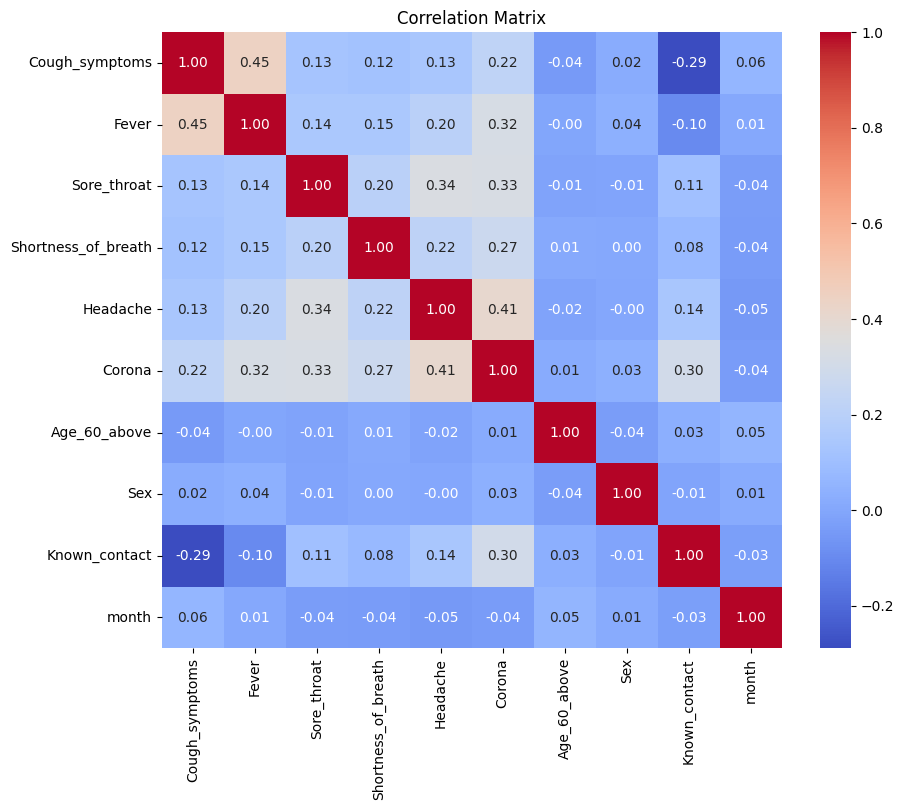

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Let's focus on correlations with an absolute value greater than 0.5, as they are considered relatively strong:

Positive Correlations:

'Cough_symptoms' and 'Fever': 0.498
'Fever' and 'Corona': 0.394
'Shortness_of_breath' and 'Corona': 0.284
'Headache' and 'Corona': 0.449


Negative Correlations:

'Cough_symptoms' and 'Known_contact': -0.347
These correlations suggest some potentially meaningful relationships in our data:

People experiencing cough symptoms may have a higher likelihood of having a fever, which is also correlated with a positive test result for COVID-19 ('Corona').

Shortness of breath and headache also show moderate positive correlations with a positive COVID-19 test result.

There's a negative correlation between reporting cough symptoms and having a known contact with a confirmed case, which might indicate that individuals with known contacts are less likely to report symptoms like coughing.


# Undersampling the data

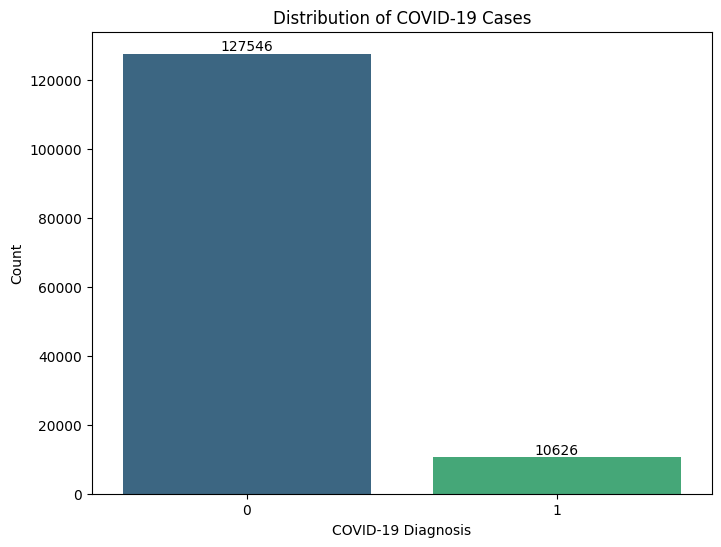

In [47]:

# Assuming 'Corona' is the correct column name
plt.figure(figsize=(8, 6))
sns.countplot(x='Corona', data=Covid_data, palette='viridis')

# Add value counts on top of the bars
for index, value in enumerate(Covid_data['Corona'].value_counts()):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.title('Distribution of COVID-19 Cases')
plt.xlabel('COVID-19 Diagnosis')
plt.ylabel('Count')
plt.show()

In [48]:
Covid_data['Corona'].value_counts()


,count
Corona,
0,127546
1,10626


Covid Positive Cases - 2,63900, Covid Negative Cases - 14694

We decided to do Undersampling instead of Oversampling because -
1. Data is abundent for Negative Cases.
2. Increasing Positive Cases by oversampling would be an issue according to real world scenario.

In [49]:
x = Covid_data.drop(columns = ['Corona'], axis = 1) # Independent Features
y = Covid_data['Corona'] # Target Feature

In [50]:
# Undersampling Covid Negative Cases (Setting n(+ve cases) = 0.6 * n(-ve cases))
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(sampling_strategy = 0.6, random_state = 42)
us_x, us_y = under.fit_resample(x, y)

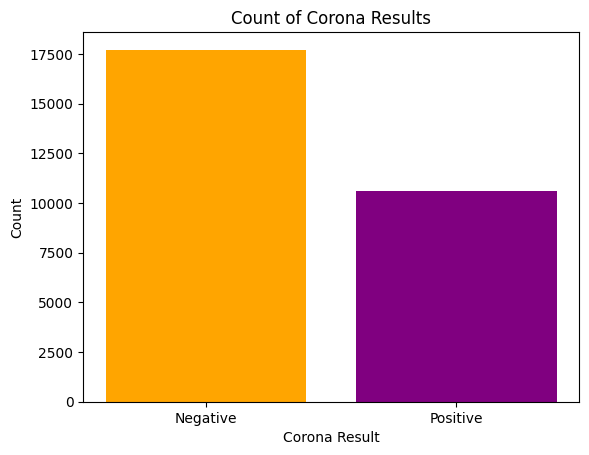

In [51]:
df = pd.DataFrame()
df['Corona_result'] = ['Negative', 'Positive']
df['Count'] = [len(us_y[us_y == 0]), len(us_y[us_y == 1])]
df = df.sort_values(by=['Count'], ascending=False)

# Plotting with matplotlib
plt.bar(df['Corona_result'], df['Count'], color=['orange', 'purple'])
plt.xlabel('Corona Result')
plt.ylabel('Count')
plt.title('Count of Corona Results')
plt.show()


In [52]:
us_x.head(3)


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,month
61758,0,0,0,0,0,0,0,1,3
97197,0,0,0,0,0,0,1,1,4
113454,0,0,0,0,0,0,0,1,4


In [53]:
us_y.value_counts()


,count
Corona,
0,17710
1,10626


# Feature Selection - Using Chi-Square Test


In [54]:
from scipy.stats import chi2_contingency

# 'Corona' is the target variable
target_variable = 'Corona'

# List of columns for chi-square tests (excluding 'month')
columns_to_test = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache','Age_60_above','Sex','Known_contact']

# Empty list to store significant features
significant_features = []

# Loop through each column and perform chi-square test
for column in columns_to_test:
    contingency_table = pd.crosstab(Covid_data[column], Covid_data['Corona'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Assuming a significance level of 0.05
    if p < 0.05:
        significant_features.append(column)

# Display the significant features
print("Significant Features:", significant_features)

Significant Features: ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']


# Selected Features


The following are the features we'll use to predict our target variable (Covid19 Positive or Negative):


Cough_symptoms : ['TRUE','FALSE']

Fever : ['FALSE','TRUE']

Sore_throat : ['TRUE','FALSE']

Shortness_of_breath : ['FALSE','TRUE']

Headache : ['FALSE','TRUE']

Age_60_above : ['Yes','No']

Sex : ['Male' , 'Female']

Known_contact : ['Abroad','Contact with confirmed','Other']

Corona(Target Variable) : ['negative','positive','other']

# Train-Test Split

In [55]:
# Setting Train:Test ratio as 70:30

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(us_x, us_y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(19835, 9)
(8501, 9)
(19835,)
(8501,)


## Machine Learning Algorithms



Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train, Y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(Y_test, y_test_pred)
classification_report_test = classification_report(Y_test, y_test_pred)

# Print results
print("Logistic Regression Model Results:")
print(f"Accuracy on Test Set: {accuracy:.2f}")
print("\nClassification Report on Test Set:")
print(classification_report_test)


Logistic Regression Model Results:
Accuracy on Test Set: 0.87

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5300
           1       0.91      0.73      0.81      3201

    accuracy                           0.87      8501
   macro avg       0.88      0.84      0.86      8501
weighted avg       0.88      0.87      0.87      8501



Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(Y_test, y_test_pred)
classification_report_test = classification_report(Y_test, y_test_pred)

# Print results for test set
print("Random Forest Model Results on Test Set:")
print(f"Accuracy: {accuracy_test:.2f}")
print("Classification Report:")
print(classification_report_test)


Random Forest Model Results on Test Set:
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5300
           1       0.90      0.77      0.83      3201

    accuracy                           0.88      8501
   macro avg       0.88      0.86      0.87      8501
weighted avg       0.88      0.88      0.88      8501



KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN model with k=5 (you can adjust k as needed)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knn_model.fit(X_train, Y_train)

# Make predictions on the test set
y_test_pred = knn_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(Y_test, y_test_pred)
classification_report_test = classification_report(Y_test, y_test_pred)

# Print results for the test set
print("KNN Model Results on Test Set:")
print(f"Accuracy: {accuracy_test:.2f}")
print("Classification Report:")
print(classification_report_test)


KNN Model Results on Test Set:
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5300
           1       0.89      0.74      0.81      3201

    accuracy                           0.87      8501
   macro avg       0.87      0.84      0.85      8501
weighted avg       0.87      0.87      0.86      8501



GradientBoost`



In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
gb_model.fit(X_train, Y_train)

# Make predictions on the test set
y_test_pred = gb_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(Y_test, y_test_pred)
classification_report_test = classification_report(Y_test, y_test_pred)

# Print results for the test set
print("Gradient Boosting Model Results on Test Set:")
print(f"Accuracy: {accuracy_test:.2f}")
print("Classification Report:")
print(classification_report_test)


Gradient Boosting Model Results on Test Set:
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      5300
           1       0.89      0.76      0.82      3201

    accuracy                           0.88      8501
   macro avg       0.88      0.85      0.86      8501
weighted avg       0.88      0.88      0.87      8501



Decision Tree

In [60]:
import plotly.express as px

fig = px.bar(
    x=['Logistic_Regression', 'Random_Forest', 'K-Nearest_neighbour','GradientBoost'],
    y=[0.86, 0.88, 0.86, 0.87],
    text=[0.86, 0.88, 0.86, 0.87],
    labels={'x': 'Machine_Learning_Algorithms', 'y': 'Accuracy (%)'},
    title='Accuracy Percentage of Machine Learning Algorithms',
    color=['Logistic_Regression', 'Random_Forest', 'K-Nearest_neighbour','GradientBoost'],
    color_discrete_sequence=['lightgreen', 'grey', 'yellow', 'lightblue']
)

fig.show()

#Conclusion

1) The Random Foret model has achieved highest accuracy  0.88%.

2)There's a positive correlation between symptoms like cough, fever, shortness
  of breath, and headache with a positive test result for COVID-19.

3) Specifically, cough symptoms seem to be strongly correlated with fever, and
   both are moderately correlated with a positive COVID-19 test result. This indicates that the presence of cough and fever may be indicative of COVID-19 infection.

4) There's a negative correlation between reporting cough symptoms and having a
  known contact with a confirmed COVID-19 case. This suggests that individuals with known contacts are less likely to report symptoms like coughing.



# What Next?

A good next step would be to discuss with our team or research on our own different options of going forward.

Could we collect more data based on the most important features?

Could we try some more models?

Could you improve the current models (beyond what we've done so far)?

The key here is to remember, our biggest restriction will be time. Hence, it's paramount to minimise the time between experiments.

The more we try, the more we figure out what doesn't work, the more we'll start to get a hang of what works.